# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("api_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_amount = [1.2, 5.3]

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).content
btc_data = json.loads(btc_data)
#print(json.dumps(btc_data, indent=4))
btc_current_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
#print(btc_current_price)

# Fetch current ETH price
eth_data = requests.get(eth_url).content
eth_data = json.loads(eth_data)
#print(json.dumps(eth_data, indent=4))
eth_current_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
#print(eth_current_price)

# Compute current value of my crpto
btc_value = crypto_amount[0] * btc_current_price
eth_value = crypto_amount[1] * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {crypto_amount[0]} BTC is ${btc_value:0.2f}")
print(f"The current value of your {crypto_amount[1]} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $59757.60
The current value of your 5.3 ETH is $11975.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
shares_data = {
    "shares" : [200, 50]
}

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2021-04-21 00:00:00-04:00  114.6  114.74  114.53  114.74  5250384  411.51   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-21 00:00:00-04:00  416.29  411.36  416.08  54772634

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.74
Current SPY closing price: $416.08


In [10]:
# Compute the current value of shares
agg_value = df_shares.loc["AGG"]["shares"] * agg_close_price
spy_value = df_shares.loc["SPY"]["shares"] * spy_close_price

# Print current value of share
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")

The current value of the 200 AGG shares is $22948.00
The current value of the 50 SPY shares is $20804.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
investment_type = ["crypto", "shares"]
value_data = {
    "amount": [btc_value + eth_value, agg_value + spy_value],
}

df_savings = pd.DataFrame(value_data, index=investment_type)

# Display savings DataFrame
display(df_savings)

amount
crypto  71732.632
shares  43752.000

<AxesSubplot:title={'center':'Saving Composition'}, ylabel='amount'>

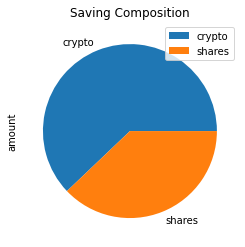

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Saving Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
saving_amount = btc_value + eth_value + agg_value + spy_value

# Validate saving health
if saving_amount > emergency_fund:
    print("Congratulation for having enough money in this fund!"),
if saving_amount == emergency_fund:
    print("Congratulation on achiving your financial goal!"),
if saving_amount < emergency_fund:
    print(f"You are {emergency_fund - saving_amount} away from your financial goals")

Congratulation for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-23', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2020-11-30 00:00:00-05:00  118.32  118.45  118.2500  118.400  5231566  362.83   
2020-12-01 00:00:00-05:00  118.03  118.10  117.7300  117.840  4308362  365.57   
2020-12-02 00:00:00-05:00  117.81  117.81  117.5400  117.705  5554915  364.82   
2020-12-03 00:00:00-05:00  117.92  117.98  117.7650  117.910  5210910  366.68   
2020-12-04 00:00:00-05:00  117.90  117.90  117.5133  117.580  4821820  367.32   

                                                               
                             high     low     close    volume  
time                                                           
2020-11-30 00:00:00-05:00  363.12  359.17  362.0000  67154075  
2020-12-01 00:00:00-05:00  367.68  364.93  365.9700  64527332  
2020-12-02 00:00:00-05:00  366.96  364.20  366.7599  37323404  
2020-12-03 00:00:00-05:00  368.19  365.50  366.6698  52905586  
2020-12-04 00:00:00-05:00  369.85  367.22  369.8300  40264568

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2020-11-30 00:00:00-05:00  118.32  118.45  118.2500  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.10  117.7300  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.81  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.98  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.90  117.5133  117.580  4821820   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-11-30 00:00:00-05:00          NaN  362.83  363.12  359.17  362.0000   
2020-12-01 00:00:00-05:00    -0.004730  365.57  367.68  364.93  365.9700   
2020-12-02 00:00:00-05:00    -0.001146  364.82  366.96  364.20  366.7599   
2020-12-03 00:00:00-05:00     0.001742  366.68  368.19  365.50  366.6698   
2020-12-04 00:00:00-05:00    -0.002799  367.32  369.85  367.22  369.8300   

                                                  
                             volume daily_return  
time                                              
2020-11-30 00:00:00-05:00  67154075          NaN  
2020-12-01 00:00:00-05:00  64527332     0.010967  
2020-12-02 00:00:00-05:00  37323404     0.002158  
2020-12-03 00:00:00-05:00  52905586    -0.000246  
2020-12-04 00:00:00-05:00  40264568     0.008619

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1           2           3           4           5    \
0       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1       1.008933    1.006464    1.002501    0.990331    0.997238    1.005276   
2       1.012079    1.006850    1.000129    0.991324    0.995769    1.010973   
3       1.011375    0.999805    1.002197    0.992562    0.987054    1.008373   
4       1.008656    1.005897    1.004554    0.988997    0.982880    1.009941   
...          ...         ...         ...         ...         ...         ...   
7556  409.127543  355.221142  228.212067  182.682001  260.705156  322.876498   
7557  411.776379  355.439692  230.318103  183.132887  258.858296  321.792543   
7558  413.298196  354.596994  230.763493  182.781892  258.781734  320.852919   
7559  414.985883  354.706011  231.403886  182.745776  258.697553  321.973658   
7560  414.125028  357.603887  231.870476  184.111472  260.514958  323.737652   

             6           7           8           9    ...         490  \
0       1.000000    1.000000    1.000000    1.000000  ...    1.000000   
1       0.998713    1.004179    0.996369    1.005800  ...    0.998729   
2       1.001897    0.999628    0.998001    1.004809  ...    1.003137   
3       0.993532    0.989266    0.997331    1.009640  ...    1.006287   
4       0.990695    0.991289    1.002735    1.019096  ...    1.001860   
...          ...         ...         ...         ...  ...         ...   
7556  118.714860  203.519098  171.886549  213.516911  ...  243.143843   
7557  119.750131  200.583513  173.114075  212.753098  ...  242.578048   
7558  120.130778  200.322199  173.128576  214.242133  ...  242.050931   
7559  119.898934  201.391018  172.386359  213.125155  ...  242.804279   
7560  119.964601  203.538464  172.223323  212.681962  ...  240.344451   

             491         492         493         494         495         496  \
0       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1       1.001191    1.004339    0.999425    0.999808    0.997536    0.998039   
2       0.996569    1.005922    1.002138    0.988407    0.990513    1.000779   
3       0.994622    1.004182    1.004373    0.992280    0.998236    0.999246   
4       0.999549    1.013438    0.998999    0.994202    0.993083    0.994304   
...          ...         ...         ...         ...         ...         ...   
7556  277.581628  269.968027  349.295423  438.373069  349.365742  212.142781   
7557  276.605173  268.977975  349.056630  439.916229  347.490670  212.274804   
7558  275.697903  268.149659  351.650517  446.419437  345.126322  210.686507   
7559  275.401685  266.729040  347.582074  445.461283  348.275831  209.937522   
7560  277.787044  265.275760  349.719513  444.932664  346.407614  210.544530   

             497         498         499  
0       1.000000    1.000000    1.000000  
1       0.995143    1.012320    1.004036  
2       0.990445    1.017956    1.010694  
3       0.988401    1.022948    1.009490  
4       0.988970    1.005060    1.000757  
...          ...         ...         ...  
7556  262.967657  187.329144  511.315044  
7557  264.005011  188.159249  509.277558  
7558  263.052049  189.842270  511.133620  
7559  262.373543  188.679892  507.542573  
7560  260.865269  188.994330  504.236525  

[7561 rows x 500 columns]

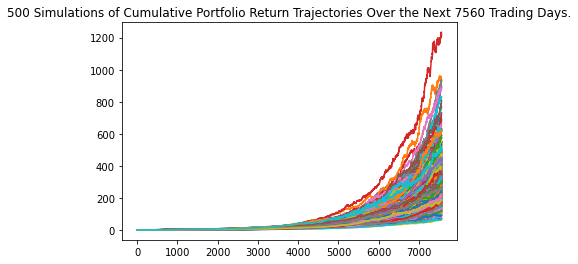

In [19]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

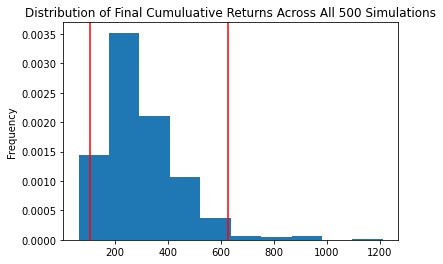

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             298.970301
std              145.924494
min               63.326569
25%              195.546544
50%              270.471310
75%              370.890802
max             1211.395527
95% CI Lower     105.944121
95% CI Upper     628.291704
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment)
ci_upper = round(tbl[9] * initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $2,118,882.0 and $12,565,834.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8] * initial_investment2)
ci_upper2 = round(tbl[9] * initial_investment2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2:,} and ${ci_upper2:,}")

There is a 95% chance that an initial investment of $30,000.0 in the portfolio over the next 30 years will end within in the range of $3,178,324.0 and $18,848,751.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20,0.80],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995677  0.989935  1.002030  1.005385  1.003607  1.009903  1.007371   
2     1.005058  0.992446  0.993909  1.023330  1.003964  1.009004  1.009881   
3     1.008906  0.983489  0.998718  1.019846  1.015925  1.006712  1.011233   
4     1.008983  0.988439  1.003911  1.010773  1.027277  1.007234  1.015065   
...        ...       ...       ...       ...       ...       ...       ...   
1256  5.705673  3.775145  3.986939  3.613901  3.024894  3.847012  2.374907   
1257  5.714654  3.748933  4.040212  3.574604  3.013074  3.869921  2.386531   
1258  5.751784  3.705840  4.034355  3.570612  3.044808  3.827042  2.382785   
1259  5.710425  3.704018  4.065039  3.535131  3.017477  3.851949  2.365064   
1260  5.684262  3.675326  4.087746  3.520478  3.068493  3.821904  2.390023   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009359  0.999617  0.999426  ...  1.002801  1.011987  0.995625   
2     1.010174  0.996789  1.002328  ...  1.003103  1.005944  0.986482   
3     1.008002  1.002408  1.004019  ...  0.999527  1.007516  0.989362   
4     1.014728  1.006608  0.997933  ...  0.999529  1.011969  0.982977   
...        ...       ...       ...  ...       ...       ...       ...   
1256  7.046746  3.739205  4.315162  ...  3.740181  5.398169  5.474487   
1257  6.965121  3.779090  4.382086  ...  3.780278  5.391669  5.436853   
1258  6.979833  3.793845  4.443955  ...  3.789324  5.352689  5.495998   
1259  6.987012  3.779740  4.445484  ...  3.773722  5.289285  5.441152   
1260  6.913815  3.758743  4.385088  ...  3.832876  5.254465  5.399930   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994042  1.000204  0.986777  1.002213  0.992116  0.994241  1.008910  
2     0.993411  1.005918  0.996339  1.003038  0.985154  0.982637  1.014409  
3     1.002120  1.006526  1.002281  0.991662  0.979590  0.996254  1.006558  
4     1.008008  1.005310  1.003345  0.995415  0.965594  0.996131  1.024027  
...        ...       ...       ...       ...       ...       ...       ...  
1256  4.365135  3.433349  2.997091  3.678980  5.153429  3.530508  2.949820  
1257  4.304708  3.452954  3.017236  3.685087  5.207171  3.553446  2.942041  
1258  4.314950  3.469230  3.011103  3.721005  5.179901  3.576458  2.950378  
1259  4.321216  3.481896  3.015651  3.724820  5.186535  3.606219  2.934732  
1260  4.347293  3.487718  3.007725  3.694536  5.230128  3.581750  2.964522  

[1261 rows x 500 columns]

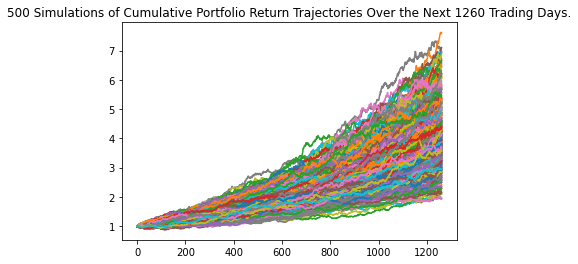

In [26]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

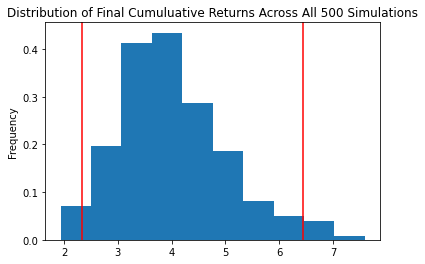

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              4.011488
std               0.993523
min               1.931482
25%               3.356865
50%               3.821794
75%               4.566243
max               7.594371
95% CI Lower      2.340276
95% CI Upper      6.443482
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment_five, 2)
ci_upper_five = round(tbl_five[9] * initial_investment_five, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five:,} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,} and ${ci_upper_five:,}")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next 5 years will end within in the range of $468,055.29 and $1,288,696.32


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20, 0.80],
    num_simulation = 500,
    num_trading_days = 252 * 10,
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.992670   1.007442   1.002140   0.992945   1.007230   0.998924   
2      0.986970   1.012495   1.002157   1.002484   1.011086   1.002164   
3      0.992406   1.007709   1.002620   0.999734   1.008932   1.008755   
4      0.991154   1.006806   1.006075   1.001850   1.005892   1.010177   
...         ...        ...        ...        ...        ...        ...   
2516  18.712827  24.909635  10.983256  25.883746  22.608189  14.802916   
2517  18.758982  24.741384  10.995331  25.842820  22.797917  14.769125   
2518  18.868008  24.622168  10.932880  25.635848  23.059700  14.967131   
2519  18.943536  24.346042  10.996808  25.724632  22.732154  15.179048   
2520  18.974641  24.259909  10.856698  25.970596  22.567793  15.123436   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.999558   1.006971   1.005826   1.020093  ...   1.002097   1.001181   
2      0.996987   1.012603   1.013725   1.020566  ...   1.002449   1.003217   
3      1.003141   1.007367   1.000565   1.020972  ...   1.004354   0.999419   
4      0.999183   1.002034   0.993584   1.013698  ...   1.009765   1.002108   
...         ...        ...        ...        ...  ...        ...        ...   
2516  11.907253  13.819699  15.634237  19.226930  ...  32.447822  10.989286   
2517  11.976210  13.871162  15.778614  19.327097  ...  32.578798  10.919954   
2518  12.059705  13.977213  15.845441  19.225068  ...  32.350070  10.842447   
2519  12.121342  13.924625  16.070315  18.949260  ...  32.255343  10.849969   
2520  12.266320  13.884546  16.239415  18.954424  ...  32.057206  10.941736   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.000882   0.994298   0.999991   0.998101   0.994686   1.008897   
2      1.003449   0.994660   1.004137   0.990309   0.997285   1.013926   
3      1.006941   1.006499   1.001550   1.002080   1.000289   1.015187   
4      0.998257   1.009570   1.004346   0.998636   0.993834   1.018081   
...         ...        ...        ...        ...        ...        ...   
2516  11.866721  31.623450  11.486467  11.233104  14.085202  14.004598   
2517  11.995031  31.789917  11.459424  11.200819  14.362749  14.189123   
2518  12.062157  31.799105  11.577896  11.116025  14.530793  14.172538   
2519  11.972712  31.825761  11.600001  11.169010  14.687136  14.219261   
2520  11.888902  31.890150  11.690135  11.011608  14.572806  14.334831   

            498        499  
0      1.000000   1.000000  
1      0.994085   1.007644  
2      0.983885   1.006760  
3      0.985907   0.999907  
4      0.988791   1.005033  
...         ...        ...  
2516  16.584974  18.641038  
2517  16.816850  18.794179  
2518  16.811013  18.657034  
2519  16.979161  18.620371  
2520  16.732374  18.807023  

[2521 rows x 500 columns]

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

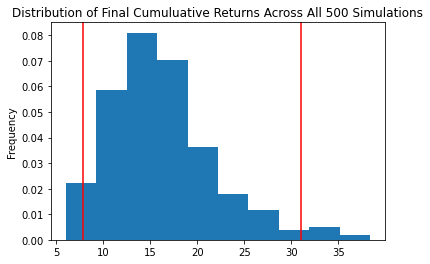

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean             16.232176
std               5.581515
min               6.044586
25%              12.265986
50%              15.367730
75%              18.959478
max              38.381871
95% CI Lower      7.923301
95% CI Upper     31.026963
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment_ten)
ci_upper_ten = round(tbl_ten[9] * initial_investment_ten)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten:,} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,} and ${ci_upper_ten:,}")

There is a 95% chance that an initial investment of $200,000 in the portfolio over the next 10 years will end within in the range of $1,584,660.0 and $6,205,393.0
